<a href="https://colab.research.google.com/github/rtajeong/M3_new_2025/blob/main/lab56_topic_modeling_rev12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSA (Latent Semantic Analysis)
- LDA (토픽 모델링) 에 아이디어 제공한 알고리즘
- DTM(document-term matrix) 나 TfIdf matrix 에 Truncated SVD 이용

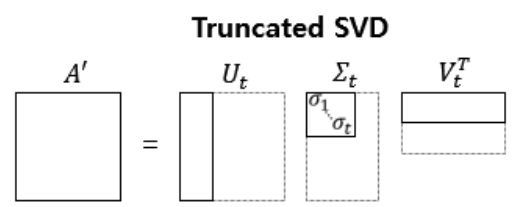

- example from https://wikidocs.net/24949

## LSA exercise

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation

doc1 = "사과 먹고 싶다"
doc2 = "바나나 먹고 싶다"
doc3 = "길고 노란 바나나 바나나"
doc4 = "저는 과일이 좋아요"
corpus = np.array([doc1, doc2, doc3, doc4])
vec = CountVectorizer()
A = vec.fit_transform(corpus).toarray()
A

array([[0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1]])

In [ ]:
vec.get_feature_names_out()

array(['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶다', '저는', '좋아요'],
      dtype=object)

In [ ]:
A.shape

(4, 9)

In [ ]:
U, s, VT = np.linalg.svd(A, full_matrices = True)
print('matrix U :')
print(U.round(2))

matrix U :
[[-0.24  0.75  0.   -0.62]
 [-0.51  0.44 -0.    0.74]
 [-0.83 -0.49 -0.   -0.27]
 [-0.   -0.    1.    0.  ]]


In [ ]:
print('singular vectors :')
print(s.round(2))

singular vectors :
[2.69 2.05 1.73 0.77]


In [ ]:
S = np.zeros((4,9))
S[:4, :4] = np.diag(s)
print(S.round(2))

[[2.69 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.73 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.77 0.   0.   0.   0.   0.  ]]


In [ ]:
print('matrix VT :')
print(VT.round(2))

matrix VT :
[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]
 [ 0.58 -0.    0.    0.   -0.    0.   -0.    0.58  0.58]
 [ 0.   -0.35 -0.35  0.16  0.25 -0.8   0.16 -0.   -0.  ]
 [-0.   -0.78 -0.01 -0.2   0.4   0.4  -0.2   0.    0.  ]
 [-0.29  0.31 -0.78 -0.24  0.23  0.23  0.01  0.14  0.14]
 [-0.29 -0.1   0.26 -0.59 -0.08 -0.08  0.66  0.14  0.14]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19  0.75 -0.25]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19 -0.25  0.75]]


In [ ]:
np.allclose(A, np.dot(np.dot(U,S), VT).round(2))

True

In [ ]:
# let's take the top 2 signular values. -> 2 topics
S = S[:2, :2]; S.round(2)

array([[2.69, 0.  ],
       [0.  , 2.05]])

In [ ]:
U = U[:, :2]; U.round(2)   # (4,2) -> 문서의 수 x 토픽의 수
                           # U의 각 행은 잠재 의미를 표현하기 위한 수치화 된 각각의 문서 벡터

array([[-0.24,  0.75],
       [-0.51,  0.44],
       [-0.83, -0.49],
       [-0.  , -0.  ]])

In [ ]:
VT = VT[:2, :]; VT.round(2)   # (2,9) -> 토픽의 수 x 단어의 갯수
                              # VT 의 각 열은 잠재 의미를 표현하기 위해 수치화된 각각의 단어 벡터

array([[-0.  , -0.31, -0.31, -0.28, -0.8 , -0.09, -0.28, -0.  , -0.  ],
       [ 0.  , -0.24, -0.24,  0.58, -0.26,  0.37,  0.58, -0.  , -0.  ]])

In [ ]:
A_prime = U @ S @ VT; A_prime.round(2)

array([[ 0.  , -0.17, -0.17,  1.08,  0.12,  0.62,  1.08, -0.  , -0.  ],
       [ 0.  ,  0.2 ,  0.2 ,  0.91,  0.86,  0.45,  0.91,  0.  ,  0.  ],
       [ 0.  ,  0.93,  0.93,  0.03,  2.05, -0.17,  0.03,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ]])

- it is a little different from the original matrix because of the truncation.

- Let's use the library function

In [ ]:
svd_model = TruncatedSVD(n_components=2, random_state=122)
svd_model.fit(A)
svd_model.components_.round(2)      # VT matrix

array([[-0.  ,  0.31,  0.31,  0.28,  0.8 ,  0.09,  0.28, -0.  , -0.  ],
       [-0.  , -0.24, -0.24,  0.58, -0.26,  0.37,  0.58, -0.  , -0.  ]])

In [ ]:
svd_model.singular_values_

array([2.68731789, 2.04508425])

## LSA (sklearn) with newsgroup data
  - Twenty Newsgroups이라고 불리는 20개의 다른 주제를 가진 뉴스그룹 데이터 (sklearn)
  - 문서의 수를 원하는 토픽의 수로 압축한 뒤에 각 토픽당 가장 중요한 단어 5개를 출력하는 실습으로 토픽 모델링을 수행

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation

In [ ]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('샘플의 수 :',len(documents))

샘플의 수 : 11314


In [ ]:
# dir(dataset)

In [ ]:
dataset.target

array([17,  0, 17, ...,  9,  4,  9])

In [ ]:
dataset.target_names      #  20개의 뉴스그룹 카테고리

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
documents[0]

"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [ ]:
pd.DataFrame({'document':documents})

,document
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."
...,...
11309,"Danny Rubenstein, an Israeli journalist, will ..."
11310,\n
11311,\nI agree. Home runs off Clemens are always m...
11312,I used HP DeskJet with Orange Micros Grappler ...


In [ ]:
# text preprocessing
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [ ]:
news_df['clean_doc'][0]

'well sure about story seem biased. what disagree with your statement that u.s. media ruin israels reputation. that rediculous. u.s. media most pro-israeli media world. having lived europe realize that incidences such described letter have occured. u.s. media whole seem ignore them. u.s. subsidizing israels existance europeans least same degree). think that might reason they report more clearly atrocities. what shame that austria, daily reports inhuman acts commited israeli soldiers blessing received from government makes some holocaust guilt away. after all, look jews treating other races when they power. unfortunate.'

In [ ]:
# NLTK로부터 불용어를 받아와 제거한다.
nltk.download('stopwords')
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())   # split default - any whitespace
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(tokenized_doc[:2])

0    [well, sure, story, seem, biased., disagree, s...
1    [yeah,, expect, people, read, faq,, etc., actu...
Name: clean_doc, dtype: object


In [ ]:
# tf-idf matrix
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [ ]:
news_df['clean_doc'][0]

'well sure story seem biased. disagree statement u.s. media ruin israels reputation. rediculous. u.s. media pro-israeli media world. lived europe realize incidences described letter occured. u.s. media whole seem ignore them. u.s. subsidizing israels existance europeans least degree). think might reason report clearly atrocities. shame austria, daily reports inhuman acts commited israeli soldiers blessing received government makes holocaust guilt away. all, look jews treating races power. unfortunate.'

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english',
                             max_features= 1000, # 상위 1,000개의 단어
                             max_df = 0.5,       # ignore terms of df higher than 0.5
                             smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

print(X.shape)

(11314, 1000)


In [ ]:
# topic modeling
svd_model = TruncatedSVD(n_components=20,
                         n_iter=100,
                         random_state=122)
svd_model.fit(X)

document_topic_matrix = svd_model.transform(X)   # U matrix
topic_word_matrix = svd_model.components_        # VT matrix

print(document_topic_matrix.shape, topic_word_matrix.shape)

(11314, 20) (20, 1000)


In [ ]:
svd_model.singular_values_  # singular values do not have any meaning.

array([16.90871344, 10.00598331,  8.21936031,  7.98269175,  7.70075419,
        7.58424343,  7.24908661,  7.17123904,  6.90917796,  6.86585132,
        6.76982639,  6.67631039,  6.58982357,  6.49789562,  6.42711266,
        6.32897935,  6.22690358,  6.21905139,  6.09497502,  6.00365555])

- 각 20개의 topic에 대해 각 1,000개의 열 (words) 중 가장 값이 큰 5개의 값을 찾아서 단어로 출력.

In [ ]:
# first row 에 대해 먼저 확인
idx_5 = svd_model.components_[0].argsort()[-5:]
idx_5

array([405, 895, 654, 488, 514])

In [ ]:
[vectorizer.get_feature_names_out()[i] for i in idx_5][::-1]

['like', 'know', 'people', 'think', 'good']

In [ ]:
# 모든 row 에 대해 확인
terms = vectorizer.get_feature_names_out()       # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components, 1):
        # print("Topic %d:" % (idx), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
        print("Topic %d:" % (idx), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[-n:][::-1]])

get_topics(svd_model.components_, terms)

Topic 1: [('like', 0.21065), ('know', 0.19865), ('people', 0.19337), ('think', 0.17695), ('good', 0.15024)]
Topic 2: [('thanks', 0.31432), ('windows', 0.27918), ('card', 0.17317), ('drive', 0.16121), ('mail', 0.14636)]
Topic 3: [('game', 0.36793), ('team', 0.31524), ('year', 0.28778), ('games', 0.23177), ('season', 0.17117)]
Topic 4: [('edu', 0.49691), ('thanks', 0.25806), ('mail', 0.17646), ('com', 0.11305), ('email', 0.11137)]
Topic 5: [('edu', 0.51015), ('drive', 0.24504), ('com', 0.1097), ('sale', 0.10501), ('soon', 0.09464)]
Topic 6: [('drive', 0.40158), ('thanks', 0.34907), ('know', 0.28252), ('scsi', 0.13753), ('mail', 0.11316)]
Topic 7: [('edu', 0.31635), ('jesus', 0.25546), ('windows', 0.24535), ('god', 0.22169), ('think', 0.21324)]
Topic 8: [('like', 0.65894), ('edu', 0.323), ('know', 0.1302), ('think', 0.12868), ('bike', 0.11997)]
Topic 9: [('card', 0.3647), ('sale', 0.17649), ('00', 0.17369), ('video', 0.17295), ('like', 0.15977)]
Topic 10: [('card', 0.44814), ('people', 0.

- Pros and Cons of LSA:
  - can be implemented easily and quickly.
  - good performance in calculating the similarity of documents as it can derive the potential meaning of word
  - But, if you add new data, you should recalculate it (difficult to update)
  - that is why word embedding (like Word2Vec) is in the spotlight.

# LDA in sklearn

In [ ]:
lda = LatentDirichletAllocation(n_components=20,
                                learning_method="batch",
                                max_iter=100,
                                random_state=0)

lda.fit(X)

document_topic_matrix = lda.transform(X)  # document-topic distribution
topic_word_matrix = lda.components_       # topic-term distribution

print(document_topic_matrix.shape, topic_word_matrix.shape)

(11314, 20) (20, 1000)


In [ ]:
lda.components_[0].argsort()[-5:]

array([ 69, 325, 219, 541, 891])

In [ ]:
lda.get_params()   # doc_topic_prior = alpha, topic_word_prior = beta
                   # both are by default 1/n_components

{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'batch',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 100,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': 0,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}

In [ ]:
# 모든 row 에 대해 확인
get_topics(topic_word_matrix, terms)  # weights of the words (not normalized)

Topic 1: [('thanks', 75.69841), ('mail', 61.62377), ('com', 39.48449), ('email', 37.62687), ('address', 37.24144)]
Topic 2: [('israel', 55.53628), ('israeli', 37.20356), ('jews', 34.61991), ('jewish', 29.52117), ('arab', 22.98782)]
Topic 3: [('game', 91.04487), ('team', 82.35589), ('year', 73.8464), ('games', 57.60053), ('season', 50.56377)]
Topic 4: [('ground', 17.45798), ('steve', 16.1337), ('right', 15.28165), ('road', 14.12756), ('like', 13.16867)]
Topic 5: [('heard', 24.32218), ('answer', 23.45181), ('test', 14.5236), ('wrong', 13.99687), ('question', 12.60743)]
Topic 6: [('windows', 86.23189), ('file', 81.68926), ('window', 67.93843), ('files', 65.94893), ('program', 63.36699)]
Topic 7: [('sale', 60.17541), ('00', 60.0818), ('offer', 41.19371), ('shipping', 36.04174), ('condition', 35.52678)]
Topic 8: [('space', 61.05722), ('nasa', 37.9189), ('research', 25.48799), ('university', 22.64059), ('orbit', 22.34802)]
Topic 9: [('people', 98.44324), ('government', 61.26473), ('think', 5

- try to compare the results with the target

In [ ]:
dataset.target_names      #  20개의 뉴스그룹 카테고리

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

- in LSA(TruncatedSVD)
  - components_: topic-term distribution
  - transform(): provides the document-topic distribution
- in LDA
  - components_: Represents the term-topic distribution (similar to the right singular vectors in SVD).
  - transform(): Provides the topic-document distribution (similar to the left singular vectors in SVD).

# Two libraries for LDA



- sklearn:
  - 주요 초점: 범용 머신러닝 라이브러리다. LDA 구현은 광범위한 머신러닝 알고리즘 스위트의 일부이며, 일반적인 데이터 분석 작업을 위해 설계되었다.
  - 사용 편의성: 다른 머신러닝 작업에 Scikit-learn을 이미 사용하고 있다면, LDA를 사용하기에 편리하고 기존 워크플로우와 일관성이 있다.
  - 다른 ML 알고리즘과의 통합: LDA와 다른 머신러닝 기술을 쉽게 통합할 수 있으며, 다양한 알고리즘에 대해 일관된 API를 제공한다.
- gensim:
  - 주요 초점: 자연어 처리(NLP)와 **토픽 모델링(Topic Modeling)**에 특화되어 설계되었다. 대규모 텍스트 코퍼스(text corpora) 처리에 매우 적합하다.
  - 점진적 훈련: LDA 모델의 **점진적 훈련(Incremental Training)**을 지원한다. 이는 전체 데이터셋을 재처리할 필요 없이 모델을 실시간으로 업데이트하는 데 유용하다.
  - 효율성: 메모리 효율성과 **확장성(Scalability)**이 뛰어나다. 매우 큰 텍스트 코퍼스를 효율적으로 처리할 수 있다.
  - 맞춤 설정: LDA 매개변수 사용자 지정 및 모델 미세 조정(fine-tuning)에 더 많은 유연성을 제공한다.

# LDA in gensim
- LDA는 문서들은 토픽들의 혼합으로 구성되어져 있으며, 토픽들은 확률 분포에 기반하여 단어들을 생성한다고 가정.
- 데이터가 주어지면, LDA는 문서가 생성되던 과정을 역추적
- https://wikidocs.net/30708

- LDA algorithm:
  - (1) hyperparameter k is given
  - (2) assign all words to one of k topics
  - (3) iterate followings:
     - assume the word w is mis-assigned and all others are well- assigned
     - re-assign w based on:
        - p(topic t | document d) : 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율
        - p(word w | topic t) : 각 토픽들 t에서 해당 단어 w의 분포

In [ ]:
# let's use the same dataset as we used in LSA
print(tokenized_doc.shape)
tokenized_doc[:5]

(11314,)


,clean_doc
0,"[well, sure, story, seem, biased., disagree, s..."
1,"[yeah,, expect, people, read, faq,, etc., actu..."
2,"[although, realize, principle, strongest, poin..."
3,"[notwithstanding, legitimate, fuss, proposal,,..."
4,"[well,, change, scoring, playoff, pool., unfor..."


- record word frequency (word_id, word_freq)

In [ ]:
!pip install gensim

In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[:2])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 4), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 4), (55, 1), (56, 1), (57, 1), (58, 1)], [(59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 2), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1)]]


In [ ]:
# LDA train
import gensim

NUM_TOPICS = 20      # 20개의 토픽, k=20
# train the model
ldamodel = gensim.models.ldamodel.LdaModel(corpus,
                                           num_topics = NUM_TOPICS,
                                           id2word=dictionary,
                                           passes=15)   # The model is trained during the instantiation.

topics = ldamodel.print_topics(num_words=5)  # 5 개의 단어만 출력
for topic in topics:
    print(topic)

(0, '0.006*"pens" + 0.005*"cheers," + 0.005*"kent" + 0.004*"caps" + 0.003*"resources."')
(1, '0.014*"jesus" + 0.009*"christian" + 0.008*"bible" + 0.007*"christians" + 0.006*"believe"')
(2, '0.013*"period" + 0.009*"power" + 0.008*"---------------" + 0.008*"scorer" + 0.007*"play:"')
(3, '0.005*"price:" + 0.004*"os/2" + 0.003*"voltage" + 0.003*"x-based" + 0.003*"engine"')
(4, '0.017*"team" + 0.016*"game" + 0.011*"games" + 0.010*"play" + 0.009*"hockey"')
(5, '0.013*"armenian" + 0.011*"president" + 0.010*"armenians" + 0.010*"turkish" + 0.007*"russian"')
(6, '0.014*"would" + 0.010*"people" + 0.008*"think" + 0.008*"like" + 0.006*"even"')
(7, '0.007*"cubs" + 0.004*"3.5"" + 0.003*"0.333" + 0.003*"suck" + 0.002*"idle"')
(8, '0.010*"government" + 0.007*"state" + 0.006*"public" + 0.006*"israel" + 0.006*"jews"')
(9, '0.003*"fleet" + 0.002*"burnt" + 0.002*"dodge" + 0.002*"nissan" + 0.002*"hitter"')
(10, '0.010*"water" + 0.010*"ground" + 0.006*"wiring" + 0.005*"helmet" + 0.005*"dept"')
(11, '0.013*"-

In [ ]:
# see the topics as a list of words
# - no natural ordering between the topics in LDA.

ldamodel.show_topics(num_topics=20, num_words=5, log=False, formatted=True)   # 10 개 단어 출력

[(0,
  '0.006*"pens" + 0.005*"cheers," + 0.005*"kent" + 0.004*"caps" + 0.003*"resources."'),
 (1,
  '0.014*"jesus" + 0.009*"christian" + 0.008*"bible" + 0.007*"christians" + 0.006*"believe"'),
 (2,
  '0.013*"period" + 0.009*"power" + 0.008*"---------------" + 0.008*"scorer" + 0.007*"play:"'),
 (3,
  '0.005*"price:" + 0.004*"os/2" + 0.003*"voltage" + 0.003*"x-based" + 0.003*"engine"'),
 (4,
  '0.017*"team" + 0.016*"game" + 0.011*"games" + 0.010*"play" + 0.009*"hockey"'),
 (5,
  '0.013*"armenian" + 0.011*"president" + 0.010*"armenians" + 0.010*"turkish" + 0.007*"russian"'),
 (6,
  '0.014*"would" + 0.010*"people" + 0.008*"think" + 0.008*"like" + 0.006*"even"'),
 (7,
  '0.007*"cubs" + 0.004*"3.5"" + 0.003*"0.333" + 0.003*"suck" + 0.002*"idle"'),
 (8,
  '0.010*"government" + 0.007*"state" + 0.006*"public" + 0.006*"israel" + 0.006*"jews"'),
 (9,
  '0.003*"fleet" + 0.002*"burnt" + 0.002*"dodge" + 0.002*"nissan" + 0.002*"hitter"'),
 (10,
  '0.010*"water" + 0.010*"ground" + 0.006*"wiring" + 0.0

- visualize LDA

In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 70.8 MB/s eta 0:00:00


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models  # Only needed if using gensim LDA

pyLDAvis.enable_notebook()     # to enable the display in notebooks
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


- 문서 별 토픽 분포 보기

In [ ]:
len(ldamodel[corpus])

11314

In [ ]:
ldamodel[corpus][0]

[(4, 0.016341686),
 (5, 0.07639746),
 (6, 0.5015181),
 (8, 0.25631747),
 (11, 0.11601289),
 (12, 0.021670874)]

In [ ]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==10:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(4, 0.016341679), (5, 0.07639757), (6, 0.50151944), (8, 0.25631574), (11, 0.11601297), (12, 0.02167107)]
1 번째 문서의 topic 비율은 [(0, 0.16762997), (1, 0.17105627), (6, 0.44590127), (12, 0.19633415)]
2 번째 문서의 topic 비율은 [(2, 0.11448127), (6, 0.530352), (8, 0.25861067), (12, 0.083404206)]
3 번째 문서의 topic 비율은 [(6, 0.27809548), (8, 0.20405413), (11, 0.060431354), (12, 0.43044832), (15, 0.016061446)]
4 번째 문서의 topic 비율은 [(4, 0.28952998), (6, 0.3315105), (12, 0.088167004), (17, 0.26112366)]
5 번째 문서의 topic 비율은 [(1, 0.2289149), (6, 0.52610093), (16, 0.20243263)]
6 번째 문서의 topic 비율은 [(4, 0.021357829), (6, 0.14592911), (11, 0.02802942), (12, 0.79366386)]
7 번째 문서의 topic 비율은 [(4, 0.19161019), (5, 0.018666338), (6, 0.586041), (8, 0.092120565), (12, 0.099198505)]
8 번째 문서의 topic 비율은 [(2, 0.2582735), (5, 0.03923074), (6, 0.42182654), (12, 0.22936803), (15, 0.029799765)]
9 번째 문서의 topic 비율은 [(5, 0.11784798), (6, 0.4460553), (12, 0.42373195)]


In [ ]:
doc = ldamodel[corpus][0]
doc = sorted(doc, key=lambda x: (x[1]), reverse=True) # topic ratio value 값으로 정렬
doc

[(6, 0.50151926),
 (8, 0.25631592),
 (11, 0.11601296),
 (5, 0.07639758),
 (12, 0.021671036),
 (4, 0.016341677)]

In [ ]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%),
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                # topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                new_data = pd.Series([int(topic_num), round(prop_topic,4), topic_list])
                # print(new_data)
                topic_table = pd.concat([topic_table, new_data.to_frame().T], ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
        # break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable.head()

,0,1,2
0,6,0.5015,"[(4, 0.016341683), (5, 0.07639744), (6, 0.5015..."
1,6,0.4459,"[(0, 0.16762997), (1, 0.17105608), (6, 0.44591..."
2,6,0.5306,"[(2, 0.11448172), (6, 0.53059363), (8, 0.25860..."
3,12,0.4305,"[(6, 0.27805474), (8, 0.20405556), (11, 0.0604..."
4,6,0.3317,"[(4, 0.28950882), (6, 0.33165643), (12, 0.0880..."


In [ ]:
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,6,0.5015,"[(4, 0.016341683), (5, 0.07639744), (6, 0.5015..."
1,1,6,0.4459,"[(0, 0.16762997), (1, 0.17105608), (6, 0.44591..."
2,2,6,0.5306,"[(2, 0.11448172), (6, 0.53059363), (8, 0.25860..."
3,3,12,0.4305,"[(6, 0.27805474), (8, 0.20405556), (11, 0.0604..."
4,4,6,0.3317,"[(4, 0.28950882), (6, 0.33165643), (12, 0.0880..."
5,5,6,0.526,"[(1, 0.2289782), (6, 0.5260376), (16, 0.202432..."
6,6,12,0.7937,"[(4, 0.021364672), (6, 0.14588687), (11, 0.028..."
7,7,6,0.5861,"[(4, 0.19160965), (5, 0.018666388), (6, 0.5860..."
8,8,6,0.4215,"[(2, 0.25827277), (5, 0.039193396), (6, 0.4214..."
9,9,6,0.4463,"[(5, 0.11784403), (6, 0.44628668), (12, 0.4235..."


# \-------------------------

# 한국말 예제 - sklearn

## 샘플 데이터

In [ ]:
!pip install konlpy

In [ ]:
import konlpy
import numpy as np
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from konlpy.tag import Okt

In [ ]:
list_doc = ["나는 학교에 갑니다.",
      "우리는 학교에서 공부를 합니다.",
      "학교에서는 운동도 합니다.",
      "지금은 골프하기에 아주 좋은 날씨입니다.",
      "축구를 학교에서 시청하기도 합니다.",
      "공부를 열시히 해서 좋은 데이터 엔지니어가 될 것입니다.",
      "학교에서는 많은 친구를 사귑니다."]

okt = Okt()
results = []
for line in list_doc:
    word_list = okt.pos(line, norm=True, stem=True)
    words = []
    for word in word_list:
        if not word[1] in ["Josa", "eomi", "Punctuation", "Verb"]:
            words.append(word[0])
    words = (" ".join(words)).strip()
    results.append(words)


In [ ]:
results

['나 학교',
 '우리 학교 공부',
 '학교 운동',
 '지금 골프 아주 좋다 날씨 이다',
 '축구 학교 시청',
 '공부 좋다 데이터 엔지니어 것 이다',
 '학교 많다 친구']

In [ ]:
vect = CountVectorizer(max_features=10)
X = vect.fit_transform(results)

lda = LatentDirichletAllocation(n_components=5, learning_method="batch",
                                max_iter=25, random_state=0)

document_topics = lda.fit_transform(X)

In [ ]:
X.toarray().shape        # no_documents x no_words

(7, 10)

In [ ]:
 document_topics.shape   # no_documents x no_topics

(7, 5)

In [ ]:
lda.components_.shape    # no_topics x no_words

(5, 10)

In [ ]:
lda.components_.round(2)    # no of topics x number of words

array([[1.2 , 0.2 , 1.2 , 0.2 , 0.2 , 1.2 , 0.2 , 1.2 , 1.2 , 0.2 ],
       [0.2 , 1.2 , 0.2 , 1.2 , 1.19, 0.2 , 1.2 , 1.2 , 1.2 , 0.2 ],
       [0.2 , 1.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 1.2 ],
       [0.2 , 0.2 , 0.2 , 0.2 , 0.21, 0.2 , 0.2 , 0.2 , 0.2 , 4.2 ],
       [0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ]])

In [ ]:
feature_names = np.array(vect.get_feature_names_out())
N=7
for i in range(0, lda.components_.shape[0]):
    print ("topic {}:".format(i))
    topic_idx = lda.components_.argsort(axis=1)[:,::-1][i]
    print(topic_idx)
    topic_words = [topic_idx[j] for j in range(0,N)]
    print (feature_names[topic_words])

topic 0:
[8 7 0 5 2 4 9 1 6 3]
['좋다' '이다' '골프' '아주' '날씨' '많다' '학교']
topic 1:
[3 6 7 8 1 4 9 5 2 0]
['데이터' '엔지니어' '이다' '좋다' '공부' '많다' '학교']
topic 2:
[1 9 4 8 7 6 3 5 2 0]
['공부' '학교' '많다' '좋다' '이다' '엔지니어' '데이터']
topic 3:
[9 4 1 8 7 6 3 5 2 0]
['학교' '많다' '공부' '좋다' '이다' '엔지니어' '데이터']
topic 4:
[4 9 1 8 7 6 3 5 2 0]
['많다' '학교' '공부' '좋다' '이다' '엔지니어' '데이터']


<BarContainer object of 5 artists>

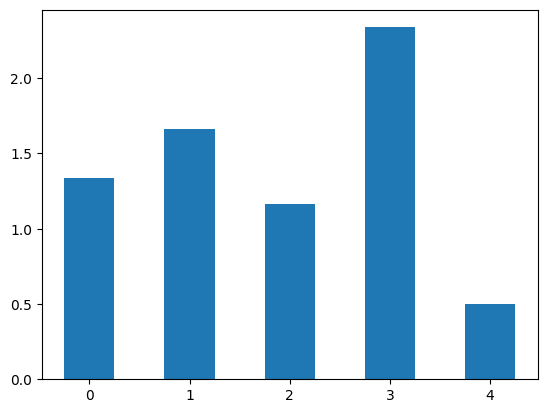

In [ ]:
import matplotlib.pyplot as plt
plt.bar(np.arange(5), np.sum(document_topics, axis=0), width=0.5)

## 실제 데이터

- 한국어 기사 예제
- 주어진 문서의 주제(카테고리)를 구분 - 비지도 학습
- 빅카인즈 뉴스기사 데이터 활용(https://www.bigkinds.or.kr/)


In [ ]:
!wget https://bit.ly/2QA9xhg -O news_1500.xlsx

--2025-09-20 12:48:57--  https://bit.ly/2QA9xhg
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.dropbox.com/s/yj1gxuy0hkjwjpu/news_1500.xlsx [following]
--2025-09-20 12:48:57--  https://www.dropbox.com/s/yj1gxuy0hkjwjpu/news_1500.xlsx
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/w1zjnxovu6lrzinc1ld0d/news_1500.xlsx?rlkey=tmxmdpq2x9t6p1opop5rw88wf [following]
--2025-09-20 12:48:57--  https://www.dropbox.com/scl/fi/w1zjnxovu6lrzinc1ld0d/news_1500.xlsx?rlkey=tmxmdpq2x9t6p1opop5rw88wf
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc041539ab572d08fdc4f3

In [ ]:
df_train = pd.read_excel('news_1500.xlsx', names=['기사'],
                         keep_default_na=False) # no strings parsed as NaN values
#Countvectorizer적용을 위해 list로 변환
list_train = df_train['기사'].tolist()

In [ ]:
df_train.head(3)

,기사
0,호주 브리즈번에서 발생한 한국인 워킹홀리데이 참가자 살해범이 같은 한국인 것으로 드...
1,호주 경찰이 한국인 워킹홀리데이 참가자를 살해한 혐의로 또 다른 한국인 남성을 기소...
2,\n \n호주 괴물 가재가 공개돼 네티즌들의 폭발적인 관심을 끌고 있다. \n ...


In [ ]:
list_train[:5], len(list_train)

(['호주 브리즈번에서 발생한 한국인 워킹홀리데이 참가자 살해범이 같은 한국인 것으로 드라나 충격을 주고 있다. \n \n20일 호주 국영 ABC방송은 퀸즐랜드주 경찰이 김모(28)씨를 살해하고 암매장한 혐의로\xa0한국인 홍모(28)씨를\xa0체포했다고 보도했다. \n \n경찰에 따르면 홍씨는\xa0지난 16일 오후 브리즈번 캐넌힐에서 1만 5000 호주달러를 원화로 환전해줄 사..',
  '호주 경찰이 한국인 워킹홀리데이 참가자를 살해한 혐의로 또 다른 한국인 남성을 기소했다고 호주 언론이 보도했다. \n \n퀸즐랜드주 경찰은 20일(현지시간) 금품을 빼앗기 위해 김민태(28)씨를 살해한 혐의로 황모(28)씨를 기소했다고 시드니모닝헤럴드가 보도했다. \n \n그는 이날 브리즈번 법원에서 열린 심리에 출석해 기자들로부터 고개를 돌린 채 아래쪽만 쳐..',
  '\xa0 \n \n호주 괴물 가재가 공개돼 네티즌들의 폭발적인 관심을 끌고 있다. \n \n최근 각종 온라인 커뮤니티 게시판에는 ‘호주 괴물 가재’라는 제목의 사진 한 장이 게재됐다. \n \n공개된 사진에는 웬만한 성인 남성 팔 크기와 비슷한 가재의 모습이 담겨 있다. 사진 속 남성도 가재가 무거운지 엉거주춤한 자세를 취하고 있다. 호주에서 잡힌 것으로 알려진 가재의..',
  '최근 인기를 끌고 있는 tvN의 드라마 ‘응답하라 1994’가 같은 장면을 내보내고 다른 프로그램의 화면이 나오는 등 방송사고를 냈다. \n▶ 방송사고 이후 사과 자막이 나오는 tvN ‘응답하라 1994’의 한 장면.20일 밤 10시쯤 드라마 ‘응답하라 1994’가 방송되는 도중에 방송사고가 발생했다. 이날 방송에서 성나정이 호주로 떠났다가 한국으로 돌아..',
  '호주 워킹홀리데이 한국인 참가자가 19일 또다시 숨진 채 발견됐다. 지난달 호주에서 한국인 여대생이 무참히 살해된 지 한 달도 지나지 않아 발생한 이번 사건으로 호주 교민사회 및 어학연수 희망자들의 불안감이 커지고 있다. \n \n호주 ABC방송 등에 따르면 퀸

In [ ]:
okt = Okt()
results = []
for line in list_train:
    word_list = okt.pos(line, norm=True, stem=True)  # part of speech (품사)
    words = []
    for word in word_list:
        if not word[1] in ["Josa", "eomi", "Punctuation", "Verb"]:
            words.append(word[0])
    words = (" ".join(words)).strip()
    results.append(words)

In [ ]:
results[:5]

['호주 브리즈번 발생 한국인 워킹홀리데이 참가자 살해 범 같다 한국인 것 드라 충격 있다 20일 호주 국영 ABC 방송 퀸즐랜드 주 경찰 김모 28 씨 살해 암매장 혐의 \xa0 한국인 홍모 28 씨 \xa0 체포 보도 경찰 홍씨 \xa0 지난 16일 오후 브리즈번 캐넌 힐 1만 5000 호주달러 원화로 환전 사',
 '호주 경찰 한국인 워킹홀리데이 참가자 살해 혐의 또 다른 한국인 남성 기소 호주 언론 보도 퀸즐랜드 주 경찰 20일 현지 시간 금품 위해 김민 태 28 씨 살해 혐의 황모 28 씨 기소 시드니 모닝 헤럴드 보도 그 이 날 브리즈번 법원 심리 출석 기자 들 로부터 고개 채 아래쪽',
 '호주 괴물 가재 공개 네티즌 들 폭발 적 관심 끌 있다 최근 각종 온라인 커뮤니티 게시판 ‘ 호주 괴물 가재 제목 사진 장이 게재 공개 사진 웬만하다 성인 남성 팔 크기 비슷하다 가재 모습 있다 사진 속 남성 가재 무겁다 엉거주춤 자세 취하 있다 호주 것 가재',
 '최근 인기 끌 있다 tvN 의 드라마 ‘ 응답 하 1994 같다 장면 다른 프로그램 화면 등 방송사고 ▶ 방송사고 이후 사과 자막 tvN ‘ 응답 하 1994 의 장면 20일 밤 10시 쯤 드라마 ‘ 응답 하 1994 방송 도중 방송사고 발생 이 날 방송 정이 호주 한국',
 '호주 워킹홀리데이 한국인 참가자 19일 또다시 채 발견 지난달 호주 한국인 여대생 무참 히 살해 달도 발생 이번 사건 호주 교민 사회 및 어학 연수 희망 자 들 불안감 있다 호주 ABC 방송 등 퀸즐랜드 주 경찰 이 날 브리즈번 남 서부 앨 지스 터 주택 뒷마당 발견 변 사체 사흘 전 행방 불']

- LDA

In [ ]:
# max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
# max_df = 25 means "ignore terms that appear in more than 25 documents".

vect = CountVectorizer(max_features=10000, max_df=.10)
X = vect.fit_transform(results)

# n_components: number of topics
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)

document_topics = lda.fit_transform(X)    # need to fit and transform in sklearn

In [ ]:
X.shape, document_topics.shape    # no_documents x no_topics

((1499, 10000), (1499, 10))

In [ ]:
document_topics[0]

array([0.00285757, 0.34826721, 0.00285731, 0.00285752, 0.00285782,
       0.00285752, 0.00285763, 0.00285804, 0.00285733, 0.62887206])

- components_[i, j] can be viewed as pseudocount that represents the number of times (word j was assigned to topic i).
-  It can also be viewed as distribution over the words for each topic after normalization:

In [ ]:
lda.components_.shape     # no_topics x no_vocabularies

(10, 10000)

In [ ]:
lda.components_[0]

array([0.1       , 0.1       , 0.10002031, ..., 0.1       , 0.10007983,
       0.1       ])

In [ ]:
lda.components_.argsort(axis=1)[:,::-1]

array([[9368, 6359, 5953, ..., 8662, 1390, 5124],
       [5415, 9345, 9784, ..., 6845, 1390, 5124],
       [5236, 5625, 9496, ..., 5404, 1634, 1390],
       ...,
       [1544, 9355, 2795, ..., 8662, 1390, 5124],
       [2771, 4059, 8924, ..., 8662, 1390, 5124],
       [1417, 4299, 6359, ..., 8662, 6845, 5124]])

In [ ]:
# 토픽마다(components_의 행) 특성을 오름차순으로 정렬한다.
# 내림차순이 되도록 [:, ::-1] 사용해 행의 정렬을 반대로 바꾼다.
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

# CountVectorizer 객체에서 특성 이름을 구한다.
feature_names = np.array(vect.get_feature_names_out())

In [ ]:
N = 10 # number of words to print for each topic
for i in range(0, lda.components_.shape[0]):
    print ("topic {}:".format(i))
    topic_idx = lda.components_.argsort(axis=1)[:,::-1][i]
    topic_words = [topic_idx[j] for j in range(0,N)]
    print (feature_names[topic_words])

topic 0:
['트럼프' '여성' '아이폰' '대통령' '스마트폰' '구글' '공개' '도널드' '넥서스' '출시']
topic 1:
['수출' '통해' '행사' '국제' '정부' '국가' '협정' '위해' '진행' '이번']
topic 2:
['소녀' '시드니' '평화' '국제' '뉴질랜드' '독일' '가장' '동물' '독도' '보도']
topic 3:
['리그' '전북' 'acl' '서울' '유학' '현대' '연맹' '챔피언스리그' '축구' '대학']
topic 4:
['일리' '메일' '외신' '일간' '공개' '보도' '여성' '포켓몬' '시드니' '남성']
topic 5:
['올림픽' '축구' '대표팀' '브라질' '감독' '경기' '월드컵' '예선' '대만' '연맹']
topic 6:
['is' '밉다' '부터' '정부' '공개' '위해' '부상' '연합' '발생' '한반도']
topic 7:
['골프' '투어' '대회' '프로' '여자' '랭킹' 'lpga' '상금' '선수' '라운드']
topic 8:
['대통령' '발표' '취업' '결과' '해외' '오바마' '지역' '회의' '대표' '지난달']
topic 9:
['경찰' '보도' '여성' '한국인' '시드니' '공개' '발견' '영상' '브리즈번' '가장']


In [ ]:
### text 에 있는 포맷 (위와 동일한 정보) ###

%matplotlib inline
import matplotlib.pyplot as plt

def print_topics(topics, feature_names, sorting, topics_per_chunk=6, n_words=20):
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")


In [ ]:
print_topics(topics=range(10), feature_names=feature_names, sorting=sorting,
             topics_per_chunk=4, n_words=10)

topic 0       topic 1       topic 2       topic 3       
--------      --------      --------      --------      
트럼프           수출            소녀            리그            
여성            통해            시드니           전북            
아이폰           행사            평화            acl           
대통령           국제            국제            서울            
스마트폰          정부            뉴질랜드          유학            
구글            국가            독일            현대            
공개            협정            가장            연맹            
도널드           위해            동물            챔피언스리그        
넥서스           진행            독도            축구            
출시            이번            보도            대학            


topic 4       topic 5       topic 6       topic 7       
--------      --------      --------      --------      
일리            올림픽           is            골프            
메일            축구            밉다            투어            
외신            대표팀           부터            대회            
일간            브라질           정

In [ ]:
# 100개 토픽으로 학습
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [ ]:
topics = np.array([7, 16, 24, 41, 45, 51, 54, 81, 89, 97])

In [ ]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 7       topic 16      topic 24      topic 41      topic 45      
--------      --------      --------      --------      --------      
대통령           위해            지역            기업            포르투갈          
국가대표          대학생           같다            나라            브라질           
21            지구            메이저리그         통해            소방관           
행사            로밍            리그            대해            스타디움          
참석            페이스북          개막전           방법            지역            
비트코인          전국            정규            남성            서울            
캐리            통해            국가            of            대결            
조지아주          요금            트럼프           has           본선            
레이크           선적            무한도전          해장            평가전           
이스트           광산            다저스           jihad         11일           


topic 51      topic 54      topic 81      topic 89      topic 97      
--------      --------      --------      --------      --------      
바다  

In [ ]:
document_topics100.shape

(1499, 100)

In [ ]:
np.argsort(document_topics100[:, 77])[::-1]

array([ 839,  730,  713, ...,  711, 1193,  805])

In [ ]:
# 관련 토픽 77를 가중치로 정렬
topic77 = np.argsort(document_topics100[:, 77])[::-1]

# 이 토픽이 가장 비중이 큰 문서 다섯개를 출력
for i in topic77[:5]:
    # 첫 두 문장을 출력합니다
    print(list_train[i], "\n")
    print("***")

울릉도와 독도 간 150km 무인 비행 및 40시간 연속정지 관측 시험에 성공하고 울릉도로 복귀하는 수중글라이더 모습. 경북대 제공 
경북대 연구진이 울릉도와 독도 간 해상에서 진행한 수중글라이더 장기 운용 실험을 국내 최초로 성공했다. 
 
경북대학교 해양과학연구소 수중무인기 통합운용센터(센터장 박종진 교수 경북대 지구시스템과학부 해양학전공)는 지난 .. 

***
탄소산업의 성과와 미래 비전을 한자리에서 살필 수 있는 기회가 마련된다. 
 
전북도는 국내외 연구기관과 기업이 참여하는 ‘제11회 국제탄소페스티벌’을 5일부터 7일까지 연다고 3일 밝혔다. 
 
이번 행사는 도청 회의실에서 ‘탄소복합재산업 허브 전북, 새로운 여정을 꿈꾸다’라는 주제로 열린다. 
 
행사 첫날 탄소밸리구축사업 우수사례 성과보고회에서는 .. 

***
해양수산부는 지난 10일~13일 대만에서 개최된 제23차 남방참다랑어보존위원회(CCSBT) 연례회의에서 2018년 남방참다랑어 어획배당량 100t을 추가 확보했다고 16일 밝혔다. 
 
CCSBT는 ‘남방참다랑어 자원의 보존관리 및 적정이용’을 목적으로 1994년5월 설립됐으며 국제협약은 2012년8월 발효됐다. 우리나라는 2001년 8월 가입했다. 회.. 

***
  
 
킨텍스(사장 임창열)는 한국 정부가 최근 국가전략 프로젝트로 ‘스마트시티’를 선정한 가운데, 스마트시티의 미래와 전략을 조망할 수 있는 국제 전시회 및 컨퍼런스인 ‘2016 스마트시티 혁신 서밋 아시아’를 개최한다고 밝혔다. 미래창조과학부, 국토교통부 등 중앙정부와 경기도 고양시 등의 후원으로 9월 20일부터 22일까지 사흘간 고양시 킨텍스에서.. 

***
포스텍(포항공과대)은 산업경영공학과 김광재 교수가 ’아시아-태평양 산업공학 경영시스템 학회(APIEMS) 석학회원에 선정됐다고 18일 밝혔다. 
 
김 교수는 미국 퍼듀대에서 박사학위를 받은 뒤 펜실베이니아 주립대를 거쳐 1997년 포스텍에 부임했다. 품질공학 분야 권위자로 국내외 저널에 우수 논문을 다수 

In [ ]:
# 한글 폰트 설치 (should restart the kernel after installing)

import matplotlib
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*
import matplotlib.font_manager
matplotlib.font_manager._load_fontmanager(try_read_cache=False)
# matplotlib.font_manager._rebuild()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fontconfig is already the newest version (2.13.1-4.2ubuntu5).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/font

In [ ]:
import platform
from matplotlib import font_manager, rc

import matplotlib.pyplot as plt
import matplotlib

if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    # rc('font', family='NanumBarunGothic')
    rc('font', family='NanumBarunGothic')
else:
    print('system error...')

<>:8: SyntaxWarning: invalid escape sequence '\W'
<>:8: SyntaxWarning: invalid escape sequence '\W'
/tmp/ipython-input-1878005112.py:8: SyntaxWarning: invalid escape sequence '\W'
  path = "c:\Windows\Fonts\malgun.ttf"


In [ ]:
sorting

array([[1144, 5625, 2779, ..., 6608, 6607, 6616],
       [1854, 5987, 9277, ..., 6593, 6591, 6601],
       [5236, 9496, 5625, ..., 6585, 6584, 6593],
       ...,
       [9934, 9678, 1724, ..., 6613, 6612, 6622],
       [ 140, 8030,  405, ..., 6588, 6587, 6596],
       [2719, 4855, 5632, ..., 6619, 6618, 6627]])

In [ ]:
feature_names.shape, feature_names[:10]

((10000,),
 array(['00', '000만', '02', '10', '100', '1000', '1000만', '1000만달러',
        '1000만원', '100년'], dtype=object))

In [ ]:
feature_names[sorting[:, :2]].shape   # 각 topic 별 가장 많이 할당된 단어 2개씩

(100, 2)

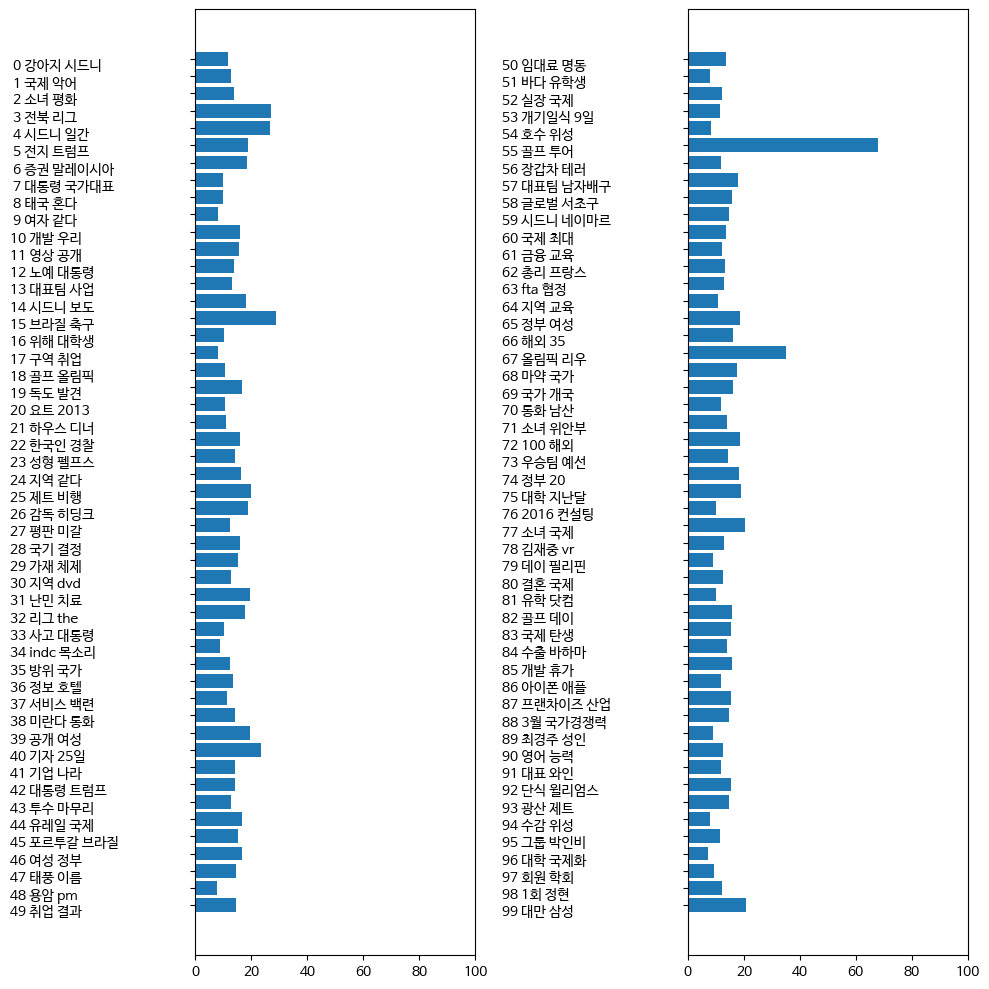

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]

# 두 개의 열이 있는 막대 그래프
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 100)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

# Exercise

## string replacement

In [ ]:
# for reference
# in Pandas dataframes, it support regular expressions in the first argument.
# But, in regular Python strings, str.replace() method does not directly support regular expressions in its first argument.
# - you will have to use re.sub()

x = "aa kk3abb bc'cc cdddd"
print(x.replace("[^a-zA-Z]", " "))

import re

x2 = re.sub(r'[^a-zA-Z]', ' ', x)
print(x2)

df = pd.DataFrame(columns=['a'])

df['a'] = [x]
df['a'] = df['a'].str.replace("[^a-zA-Z]", " ", regex=True)  # default: True will change to False in the futue version.
df


aa kk3abb bc'cc cdddd
aa kk abb bc cc cdddd


,a
0,aa kk abb bc cc cdddd


## corpora.dictionary:
- it implements the concept of a Dictionary – a mapping between words and their integer ids.

In [ ]:
from gensim.corpora import Dictionary

texts = [['human', 'interface', 'computer', 'play'],
         ['men', 'data', 'science']]
dct = Dictionary(texts)  # initialize a Dictionary

In [ ]:
dct.token2id    # token -> token_id

{'computer': 0,
 'human': 1,
 'interface': 2,
 'play': 3,
 'data': 4,
 'men': 5,
 'science': 6}

In [ ]:
dct.add_documents([["cat", "say", "meow"],
                   ["dog", "say", "walwal"],
                   ['rabbit']])  # add more document (extend the vocabulary)
dct.token2id

{'computer': 0,
 'human': 1,
 'interface': 2,
 'play': 3,
 'data': 4,
 'men': 5,
 'science': 6,
 'cat': 7,
 'meow': 8,
 'say': 9,
 'dog': 10,
 'walwal': 11,
 'rabbit': 12}

In [ ]:
len(dct)

13

In [ ]:
# convert document into BoW format(id, counts)
dct.doc2bow(["dog", "play", "computer", "computer", "any_non_existent_word"])

[(0, 2), (3, 1), (10, 1)]

## some python gramma exercises

In [ ]:
try:
    for i in range(5,-1,-1):
        print (5 // i)
except ZeroDivisionError:
    print("divide-by-zero error.")
finally:
    print("Done...")

1
1
1
2
5
divide-by-zero error.
Done...


In [ ]:
list(range(10,-1,-1))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [ ]:
("{}").format(list(range(5)))

'[0, 1, 2, 3, 4]'

In [ ]:
("{}").format(*range(5))   # unpaking 을 했지만 녛을 자리가 한 개

'0'

In [ ]:
("{}--{}").format(*range(5))

'0--1'

In [ ]:
("{}" * 5).format(*range(5))

'01234'

In [ ]:
("{:<5}" * 5).format(*range(5))

'0    1    2    3    4    '

In [ ]:
a = [1,2,3]
print(a)
print(*a)

[1, 2, 3]
1 2 3


In [ ]:
d = {"A":12, "B": 56}
print(d)
print(*d)

{'A': 12, 'B': 56}
A B


- (Example) [Wikipedia] this distribution can be used if one wanted to cut strings (each of initial length 1.0) into K pieces with different lengths, where each piece had a designated average length (on average), but allowing some variation in the relative sizes of the pieces.
- Let's draw some samples from Dirichlet distribution based on some belief.
- **alpha**: Higher alpha values concentrate the distribution more around the mean, while lower alpha values result in a more spread-out distribution

- np.random.dirichlet(): 0~1 사이의 값을 가지며 이 요소들의 합은 1 이다.

In [ ]:
np.random.dirichlet((0.1, 0.1, 0.1), 10).round(2)   # 한 쪽으로 몰리는 경향

array([[0.68, 0.03, 0.29],
       [0.  , 0.  , 1.  ],
       [0.  , 0.03, 0.97],
       [0.72, 0.28, 0.  ],
       [0.98, 0.  , 0.02],
       [0.95, 0.03, 0.02],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.01, 0.  , 0.99]])

In [ ]:
np.random.dirichlet((10, 10, 10), 10).round(2)     # 모두를 포함하는 경향

array([[0.3 , 0.41, 0.3 ],
       [0.23, 0.2 , 0.57],
       [0.31, 0.46, 0.23],
       [0.52, 0.31, 0.17],
       [0.52, 0.24, 0.23],
       [0.32, 0.32, 0.36],
       [0.45, 0.3 , 0.25],
       [0.43, 0.38, 0.19],
       [0.27, 0.42, 0.3 ],
       [0.28, 0.41, 0.31]])

In [ ]:
np.random.dirichlet((10, 0.1, 0.1), 10).round(2)

array([[0.98, 0.  , 0.02],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.89, 0.11, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.94, 0.  , 0.06],
       [0.99, 0.01, 0.  ],
       [0.98, 0.02, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [ ]:
np.random.dirichlet((1000, 1000, 1000), 10).round(2)

array([[0.33, 0.33, 0.34],
       [0.34, 0.32, 0.33],
       [0.33, 0.32, 0.34],
       [0.33, 0.33, 0.34],
       [0.33, 0.34, 0.33],
       [0.35, 0.33, 0.32],
       [0.34, 0.32, 0.34],
       [0.35, 0.33, 0.32],
       [0.33, 0.34, 0.33],
       [0.34, 0.34, 0.32]])

average length per class: [0.34340762 0.34845797 0.30813441]


[]

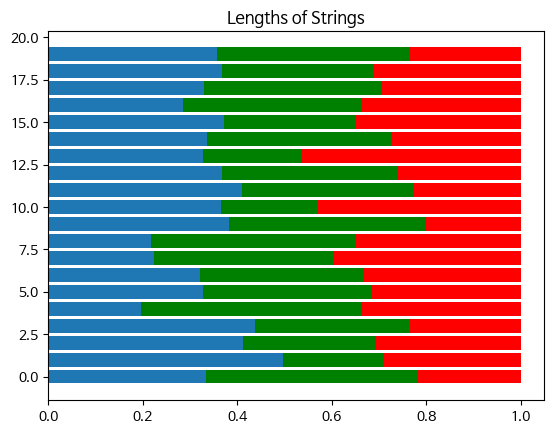

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

alpha = (10, 10, 10)       # your belief

s = np.random.dirichlet(alpha, 20)
print('average length per class:', s.mean(axis=0))

plt.barh(range(20), s[:,0])
plt.barh(range(20), s[:,1], left=s[:,0], color='g')
plt.barh(range(20), s[:,2], left=s[:,0]+s[:,1], color='r')
plt.title("Lengths of Strings")
plt.plot()

average length per class: [0.57784062 0.32678914 0.09537024]


[]

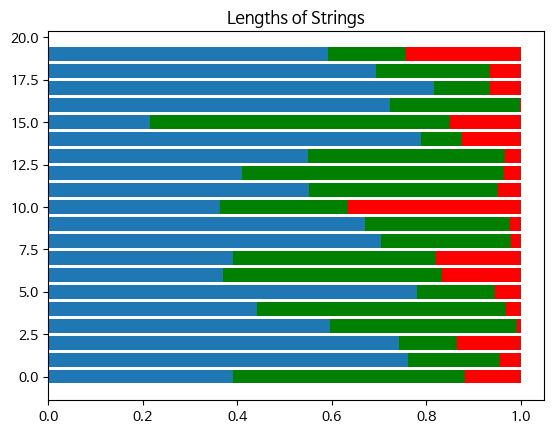

In [ ]:
alpha = (6, 3, 1)       # your belief

s = np.random.dirichlet(alpha, 20)
print('average length per class:', s.mean(axis=0))

plt.barh(range(20), s[:,0])
plt.barh(range(20), s[:,1], left=s[:,0], color='g')
plt.barh(range(20), s[:,2], left=s[:,0]+s[:,1], color='r')
plt.title("Lengths of Strings")
plt.plot()

- Let's plot the distribution of samples.
  - The distribution of each class or category in a Dirichlet distribution is not normally distributed.
  - The Dirichlet distribution is appropriate for modeling probabilities or proportions in a constrained space.

average length per class: [0.79940098 0.1504468  0.05015221]


/tmp/ipython-input-1729573612.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 500x300 with 0 Axes>

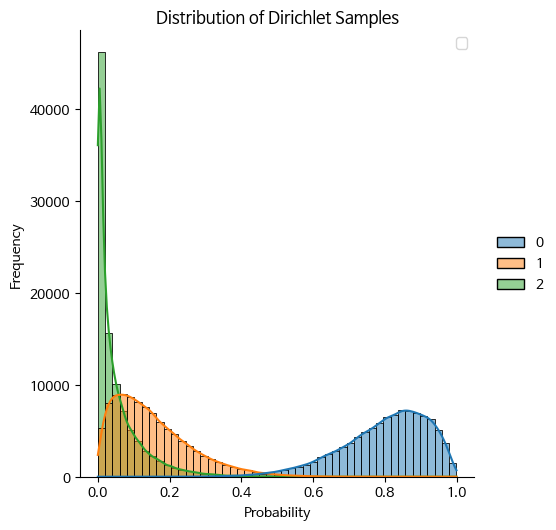

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameters (alpha values)
alpha = [8., 1.5, 0.5]             # your belief

num_samples = 100000           # Number of samples to generate

# Generate multiple random samples from the Dirichlet distribution
samples = np.random.dirichlet(alpha, size=num_samples)
print('average length per class:', samples.mean(axis=0))

# Plot the distribution of samples
plt.figure(figsize=(5, 3))

# For each category, create a histogram
sns.displot(samples, kde=True)

plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Dirichlet Samples')
plt.legend()
plt.show()


/tmp/ipython-input-3213394701.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(samples, labels=labels)
/tmp/ipython-input-3213394701.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


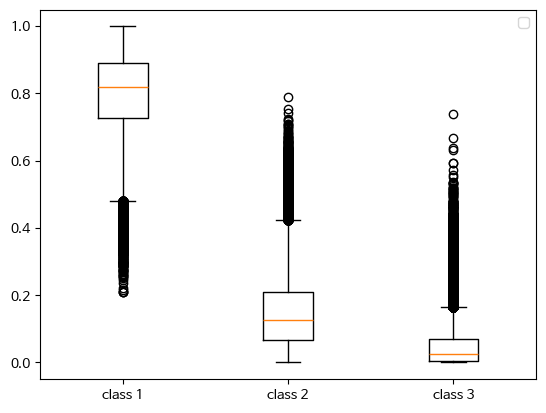

In [ ]:
labels = ['class 1', 'class 2', 'class 3']
plt.boxplot(samples, labels=labels)
plt.legend()

[0.33047222 0.33408321 0.33544456]


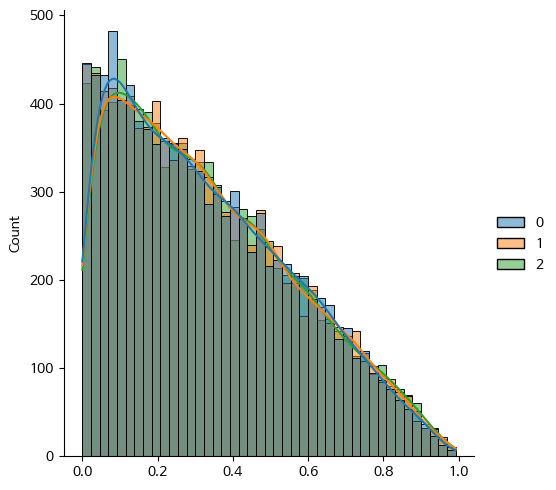

In [ ]:
num_samples = 10000           # Number of samples to generate
alphas = [[1,1,1], [50,50,50], [1,5,10], [10,50,100]]

samples = np.random.dirichlet([1,1,1], size=num_samples)
print(samples.mean(axis=0))
sns.displot(samples, kde=True)

[0.33300859 0.33252684 0.33446457]


<Figure size 400x400 with 0 Axes>

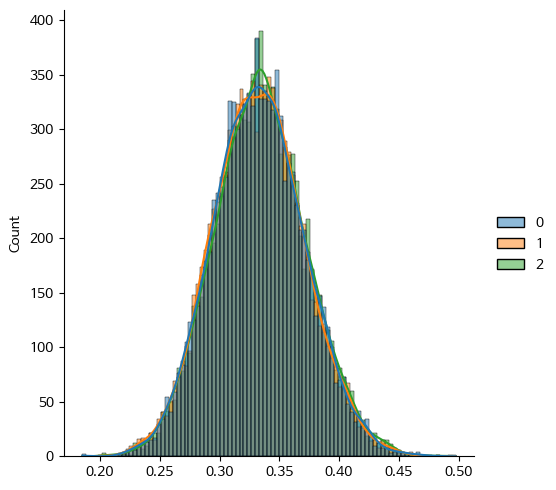

In [ ]:
samples = np.random.dirichlet([50,50,50], size=num_samples)
print(samples.mean(axis=0))
plt.figure(figsize=(4,4))
sns.displot(samples, kde=True)

<Figure size 400x400 with 0 Axes>

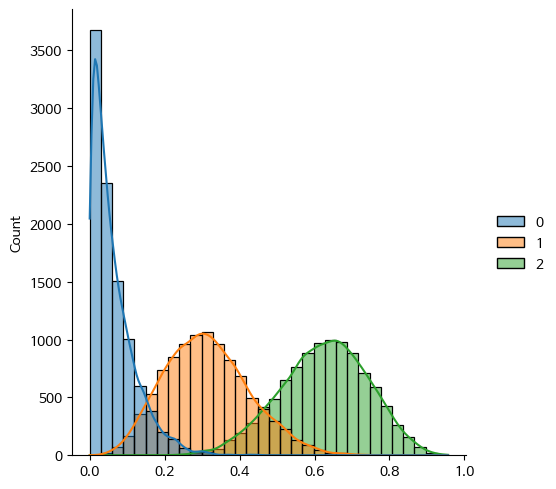

In [ ]:
samples = np.random.dirichlet([1,5,10], size=num_samples)
plt.figure(figsize=(4,4))
sns.displot(samples, kde=True)

- nice Visualization of the Drichlet Distribution
  - https://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
AREA = 0.5 * 1 * 0.75**0.5
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

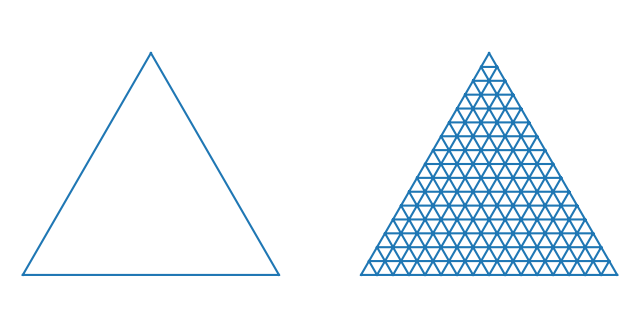

In [ ]:
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

plt.figure(figsize=(8, 4))
for (i, mesh) in enumerate((triangle, trimesh)):
    plt.subplot(1, 2, i+ 1)
    plt.triplot(mesh)
    plt.axis('off')
    plt.axis('equal')

In [ ]:
# For each corner of the triangle, the pair of other corners
pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))

def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    coords = np.array([tri_area(xy, p) for p in pairs]) / AREA
    return np.clip(coords, tol, 1.0 - tol)

In [ ]:
class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                           np.multiply.reduce([gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * np.multiply.reduce([xx ** (aa - 1)
                                               for (xx, aa)in zip(x, self._alpha)])

In [ ]:
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

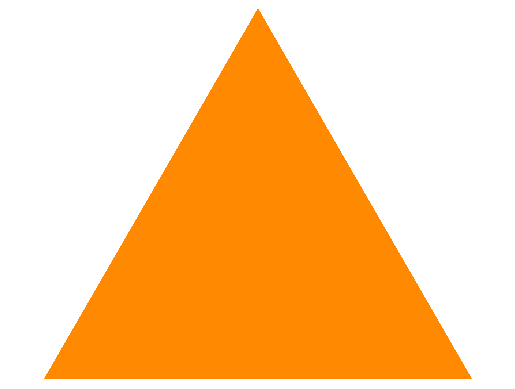

In [ ]:
draw_pdf_contours(Dirichlet([1, 1, 1]))

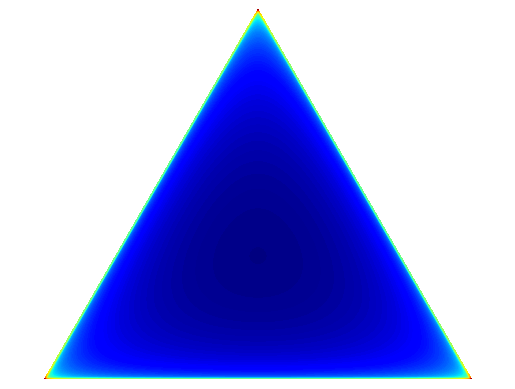

In [ ]:
draw_pdf_contours(Dirichlet([0.999, 0.999, 0.999]))

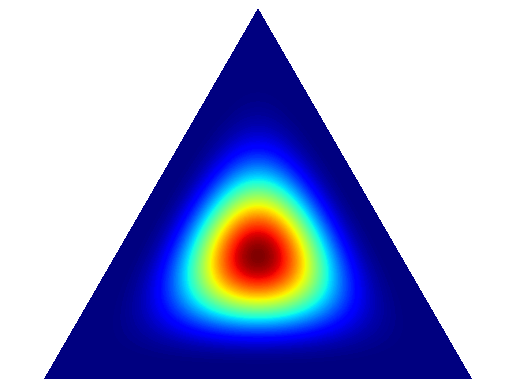

In [ ]:
draw_pdf_contours(Dirichlet([5, 5, 5]))

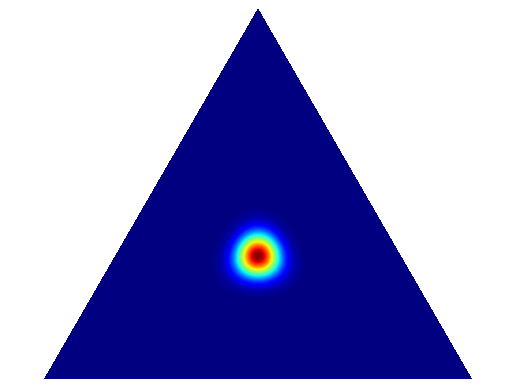

In [ ]:
draw_pdf_contours(Dirichlet([50, 50, 50]))

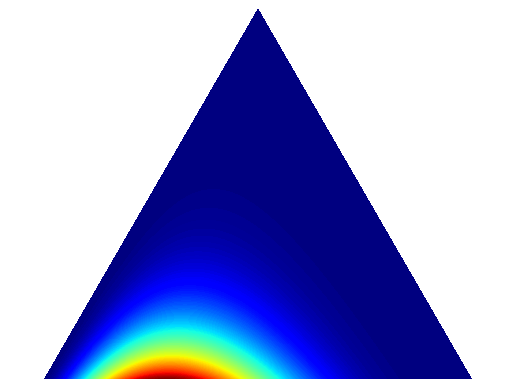

In [ ]:
draw_pdf_contours(Dirichlet([6, 3, 1]))

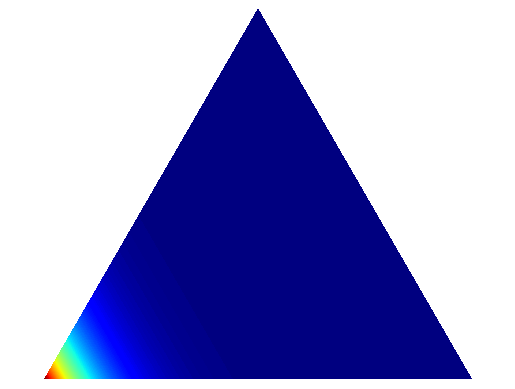

In [ ]:
draw_pdf_contours(Dirichlet([10, 1, 1]))

# Simple example for LDA
- sklearn
- gensim
- example: generated using GPT

In [ ]:
# sklearn library

from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Sample data
documents = [
    "I love programming and machine learning.",
    "Python and R are popular programming languages.",
    "Data science includes statistics and programming.",
    "Machine learning can be applied to various fields.",
    "Statistics is a fundamental aspect of data science."
]

# Preprocess the documents (convert to count vectors)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Parameters
n_topics = 3
alpha = 0.1  # doc_topic_prior
beta = 0.01  # topic_word_prior
n_iterations = 100  # Number of iterations

# Create the LDA model
lda = LatentDirichletAllocation(n_components=n_topics,
                                doc_topic_prior=alpha,
                                topic_word_prior=beta,
                                max_iter=n_iterations,
                                random_state=0)
lda.fit(X)

# Get the topic-word matrix
topic_word_matrix = lda.components_

# Normalize the topic-word matrix to get the probability distribution
topic_word_prob = topic_word_matrix / topic_word_matrix.sum(axis=1)[:, np.newaxis]

# Display normalized topics
# Print the most probable 10 words for each topic.

terms = vectorizer.get_feature_names_out()
for index, topic in enumerate(topic_word_prob):
    print(f"Topic {index + 1}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-11:-1]]))

Topic 1:
programming and python languages are popular love includes data science
Topic 2:
machine learning various fields can to applied be popular python
Topic 3:
statistics science data is fundamental of aspect popular programming python


In [ ]:
topic_word_prob[0].argsort()[:-11:-1]

array([17,  0, 18, 11,  2, 16, 13,  9,  6, 19])

In [ ]:
a = np.array([1,2])
a[:].shape, a[:,np.newaxis].shape

((2,), (2, 1))

In [ ]:
# gensim library

from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Preprocess the documents (convert to bag-of-words format)
texts = [doc.lower().split() for doc in documents]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
n_iterations =    1000  # Number of iterations

# Parameters
n_topics = 3
alpha = [0.1] * n_topics  # Can also be a single scalar value
beta = 0.01               # Can also be a list of values for each word

# Create the LDA model
lda = LdaModel(corpus=corpus,
               num_topics=n_topics,
               id2word=dictionary,
               alpha=alpha,
               eta=beta,
               iterations=n_iterations,
               random_state=0)

# Extract the topic-word distributions
topic_word_prob = lda.get_topics()

# Display normalized topics
for i, topic in enumerate(topic_word_prob):
    print(f"Topic {i + 1}:")
    print(" ".join([dictionary.get(id) for id in topic.argsort()[:-11:-1]]))

Topic 1:
and programming machine applied learning to be r are python
Topic 2:
and machine data programming statistics fields. science various love science.
Topic 3:
statistics data fundamental a programming. and is aspect of includes


--------------------------